Problem Statement: Analyzing Sales Performance by Region in a Retail Company 
Tasks to Perform: 
1. Import the "Retail_Sales_Data.csv" dataset. 
2. Explore the dataset to understand its structure and content. 
3. Identify the relevant variables for aggregating sales data, such as region, sales 
amount, and product category. 
4. Group the sales data by region and calculate the total sales amount for each region. 
5. Create bar plots or pie charts to visualize the sales distribution by region. 
6. Identify the top-performing regions based on the highest sales amount. 
7. Group the sales data by region and product category to calculate the total sales 
amount for each combination. 
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across 
different regions and product categories. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
sales_data = pd.read_csv("Retail_Sales_Data.csv")
sales_data.head()

,Transaction_Date,Region,Product_Category,Quantity_Sold,Sales_Amount
0,01-01-2023,South,Electronics,7,457.63
1,02-01-2023,South,Groceries,7,224.02
2,03-01-2023,South,Clothing,2,152.74
3,04-01-2023,North,Furniture,19,355.22
4,05-01-2023,North,Clothing,19,478.70


In [13]:
print("Number of Rows:",sales_data.shape[0])
print("Number of Columns:",sales_data.shape[1])

Number of Rows: 300
Number of Columns: 5


In [14]:
sales_data.dtypes

Transaction_Date     object
Region               object
Product_Category     object
Quantity_Sold         int64
Sales_Amount        float64
dtype: object

In [15]:
sales_data.columns

Index(['Transaction_Date', 'Region', 'Product_Category', 'Quantity_Sold',
       'Sales_Amount'],
      dtype='object')

In [16]:
sales_data.isnull().sum()

Transaction_Date    0
Region              0
Product_Category    0
Quantity_Sold       0
Sales_Amount        0
dtype: int64

In [17]:
print("\nDataset Info:")
print(sales_data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_Date  300 non-null    object 
 1   Region            300 non-null    object 
 2   Product_Category  300 non-null    object 
 3   Quantity_Sold     300 non-null    int64  
 4   Sales_Amount      300 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.8+ KB
None


In [18]:
print("\nSummary Statistics:")
print(sales_data.describe())



Summary Statistics:
       Quantity_Sold  Sales_Amount
count     300.000000     300.00000
mean        9.593333     238.30900
std         5.705242     134.82705
min         1.000000      11.64000
25%         5.000000     120.93500
50%         9.000000     247.48000
75%        15.000000     341.95000
max        19.000000     499.35000


In [19]:
# Step 5: Aggregate total sales by region
region_sales = sales_data.groupby('Region')['Sales_Amount'].sum().reset_index()

print("\nTotal Sales by Region:")
display(region_sales)


Total Sales by Region:


,Region,Sales_Amount
0,East,15730.75
1,North,19916.34
2,South,16014.27
3,West,19831.34


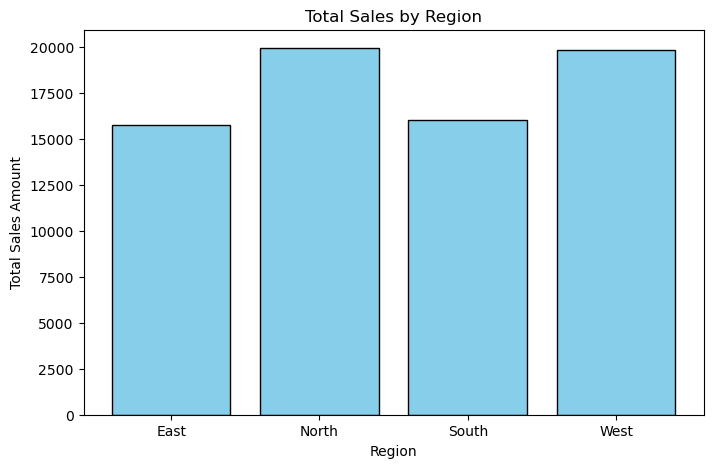

In [20]:
# Step 6: Visualize sales distribution by region (Bar Plot)
plt.figure(figsize=(8,5))
plt.bar(region_sales['Region'], region_sales['Sales_Amount'], color='skyblue', edgecolor='black')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.show()

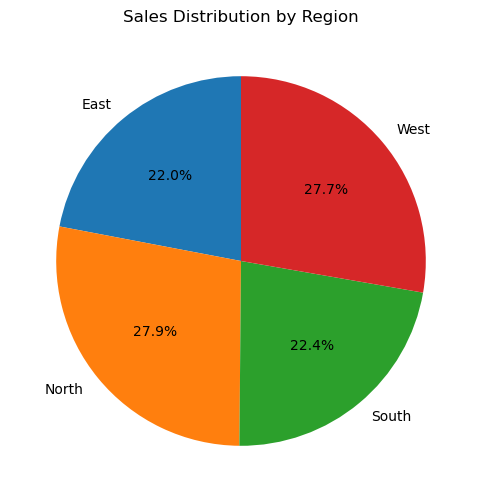

In [21]:
# Step 7: Also visualize using a Pie Chart
plt.figure(figsize=(6,6))
plt.pie(region_sales['Sales_Amount'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Region")
plt.show()

In [22]:
# Step 8: Identify top-performing regions
top_regions = region_sales.sort_values(by='Sales_Amount', ascending=False)
print("\nTop Performing Regions:")
display(top_regions)


Top Performing Regions:


,Region,Sales_Amount
1,North,19916.34
3,West,19831.34
2,South,16014.27
0,East,15730.75


In [23]:
# Step 9: Aggregate by Region and Product Category
region_category_sales = sales_data.groupby(['Region', 'Product_Category'])['Sales_Amount'].sum().unstack().fillna(0)

print("\nSales by Region and Product Category:")
display(region_category_sales)


Sales by Region and Product Category:


Product_Category,Clothing,Electronics,Furniture,Groceries
Region,,,,
East,2459.21,4109.43,6016.32,3145.79
North,4359.89,3888.83,6148.17,5519.45
South,3603.15,5696.08,2599.89,4115.15
West,2941.31,6355.43,5295.70,5238.90


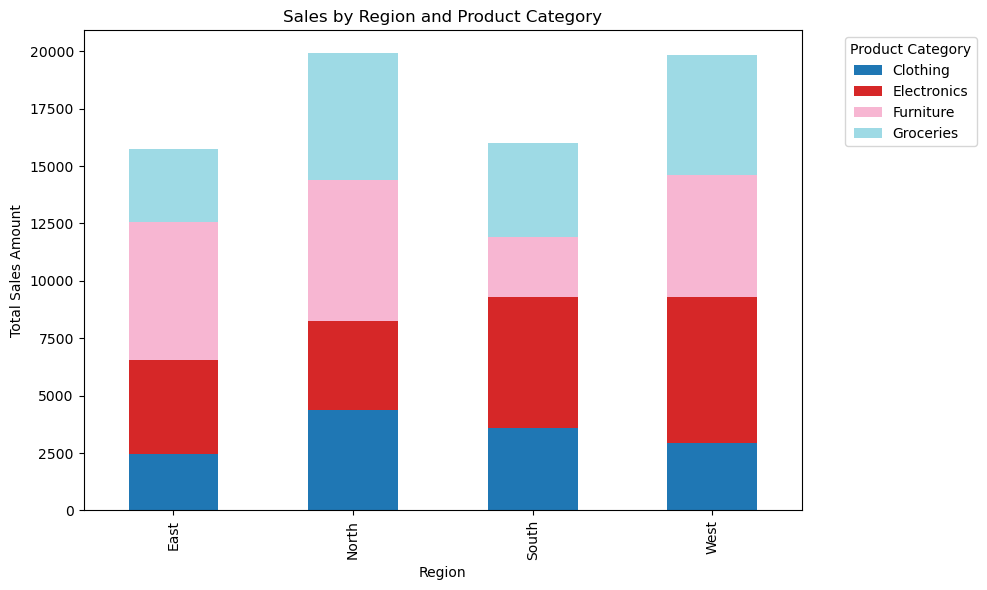

In [24]:
# Step 10: Create a Stacked Bar Plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Sales by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()